In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255,
 shear_range = 0.2,
 zoom_range = 0.2,
 horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale = 1./255)


In [2]:
test_set = test_datagen.flow_from_directory('Dataset/Test',
 target_size = (224, 224),
 batch_size = 32,
 class_mode = 'categorical')

Found 134 images belonging to 2 classes.


In [3]:
from tensorflow.keras.models import load_model

# Model saved with Keras model.save()
MODEL_PATH ='model_vgg19.h5'

# Load your trained model
model = load_model(MODEL_PATH)

In [4]:
 y_pred = model.predict(test_set)

In [5]:
y_pred

array([[3.77726299e-03, 9.96222734e-01],
       [6.21868186e-02, 9.37813222e-01],
       [9.99680638e-01, 3.19386541e-04],
       [7.33568192e-01, 2.66431868e-01],
       [2.77041905e-02, 9.72295761e-01],
       [3.51420522e-01, 6.48579478e-01],
       [9.99854922e-01, 1.45101134e-04],
       [5.62469661e-01, 4.37530398e-01],
       [9.99584496e-01, 4.15479502e-04],
       [2.66673174e-02, 9.73332644e-01],
       [9.99835610e-01, 1.64366837e-04],
       [9.99790609e-01, 2.09422928e-04],
       [9.94786859e-01, 5.21314982e-03],
       [7.95964450e-02, 9.20403600e-01],
       [2.67133638e-02, 9.73286688e-01],
       [5.22698089e-02, 9.47730184e-01],
       [9.41605926e-01, 5.83940633e-02],
       [1.42495185e-01, 8.57504845e-01],
       [1.02938088e-02, 9.89706159e-01],
       [8.48820686e-01, 1.51179254e-01],
       [9.99913931e-01, 8.60950167e-05],
       [4.26607013e-01, 5.73393047e-01],
       [1.16299026e-01, 8.83701026e-01],
       [9.75712121e-01, 2.42878925e-02],
       [5.379102

In [7]:
import numpy as np
y_pred=np.argmax(y_pred, axis=1)

In [8]:
y_pred

array([1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 0], dtype=int64)

In [9]:
test_set.class_indices

{'Parasite': 0, 'Uninfected': 1}

In [10]:
y_true=test_set.classes
y_true

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [11]:
from sklearn.metrics import confusion_matrix
cf =confusion_matrix(y_pred,y_true)

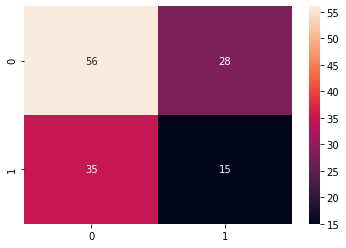

In [12]:
import seaborn as sns
sns.heatmap(cf, annot=True)